In [33]:
import torch

In [ ]:
tr_gemma2_embeddings = torch.load('tr_gemma2_embeddings.pt')
print(tr_gemma2_embeddings.shape)

In [35]:
# save embbedings split to 6 parts so that we can push to github
for i in range(6):
    torch.save(tr_gemma2_embeddings[i * 5100:(i + 1) * 5100], f'tr_gemma2_embeddings_{i}.pt')


In [37]:
tr_embeddings = []

for i in range(6):
    tr_embeddings.append(torch.load(f'tr_gemma2_embeddings_{i}.pt'))

tr_embeddings = torch.cat(tr_embeddings)

print(tr_embeddings.shape)

/var/folders/gs/crm1zcvj00j1kl0l1lvz4qf40000gn/T/ipykernel_10522/2702517850.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tr_embeddings.append(torch.load(f'tr_gemma2_e

torch.Size([30158, 2304])


In [1]:
from datasets import load_dataset

ds = load_dataset("alibayram/doktorsitesi")
df = ds['train'].to_pandas()
print(df.columns)

/Users/alibayram/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Index(['doctor_title', 'doctor_speciality', 'question_content',
       'question_answer'],
      dtype='object')


In [2]:
print(df['doctor_title'].unique())

['Dr. Öğr. Üyesi' 'Uzm. Dr.' 'Op. Dr.' 'Dyt.' 'Yrd. Doç. Dr.' 'Doç. Dr.'
 'Prof. Dr.' 'Dr.' 'Uzm. Kl. Psk.' 'Dt.' 'Dr.Öğr.Üyesi' 'Prof. Dr. Dt.'
 'Veteriner Hekim' 'Uzm. Psk.' 'Psk.' 'Dr. Dt.' 'Vet.' 'Fzt.' 'Uzm. Dyt.'
 'Uzm. Psk. Dan.' 'Psk. Dan.' 'Uzm. Dr. Dt.' 'Psikoterapist'
 'Ergoterapist' 'Doç. Dr. Dt.' 'Uzm. Dt.' 'Çocuk Gelişim Uzmanı'
 'Dr. Psk. Dan.' 'Dr. Öğr. Üyesi Dt.' 'Dil ve Konuşma Terapisti'
 'Dr. Psk.' 'Doç. Dr. Psk. Dan' 'Aile Danışmanı' 'Pedagog'
 'Klinik Psikolog ' 'Dr. Dyt. ']


In [3]:
print(df['doctor_speciality'].unique())

['ortopedi-ve-travmatoloji' 'dermatoloji'
 'ortopedi-ve-travmatoloji-el-cerrahisi-ve-mikrocerrahi'
 'genel-cerrahi-proktoloji'
 'kadin-hastaliklari-ve-dogum-jinekolojik-onkoloji' 'diyetisyen'
 'kadin-hastaliklari-ve-dogum-ureme-endokrinolojisi-ve-infertilite'
 'fiziksel-tip-ve-rehabilitasyon' 'beyin-ve-sinir-cerrahisi' 'uroloji'
 'kadin-hastaliklari-ve-dogum' 'genel-cerrahi'
 'dahiliye-ve-ic-hastaliklari-endokrinoloji-ve-metabolizma-hastaliklari'
 'dahiliye-ve-ic-hastaliklari-gastroenteroloji' 'goz-hastaliklari'
 'medikal-estetik-sertifikali-tip-doktoru'
 'cocuk-sagligi-ve-hastaliklari-cocuk-norolojisi' 'cocuk-psikiyatrisi'
 'plastik-rekonstruktif-ve-estetik-cerrahi' 'psikoloji'
 'cocuk-sagligi-ve-hastaliklari-cocuk-immunolojisi-ve-alerji-hastaliklari'
 'aile-hekimligi'
 'fiziksel-tip-ve-rehabilitasyon-fiziksel-tip-ve-rehabilitasyon-algoloji'
 'acil-tip' 'cocuk-sagligi-ve-hastaliklari-cocuk-hematoloji'
 'dahiliye-ve-ic-hastaliklari-nefroloji' 'kardiyoloji' 'dis-hekimi'
 'gogus-cerrahis

In [4]:
speciality_mapping = {
    "acil-tip": ["acil-tip"],
    "akupunktur": ["akupunktur", "akupunktur-biorezonans"],
    "algoloji": ["algoloji", "fiziksel-tip-ve-rehabilitasyon-fiziksel-tip-ve-rehabilitasyon-algoloji", "noroloji-noroloji-algoloji"],
    "anatomi": ["anatomi"],
    "anestezi-ve-reanimasyon": ["anestezi-ve-reanimasyon", "anestezi-ve-reanimasyon-algoloji-anestezi-ve-reanimasyon"],
    "aile-hekimligi": ["aile-hekimligi", "pratisyen-hekimlik"],
    "aile-danismani": ["aile-danismani", "psikoloji-aile-danismani-psikolog", "klinik-psikolog-psikoloji-aile-danismani-psikolog", "dil-konusma-bozuklari-b-aile-danismani"],
    "diyetisyen": ["diyetisyen"],
    "beyin-ve-sinir-cerrahisi": ["beyin-ve-sinir-cerrahisi"],
    "cocuk-cerrahisi": ["cocuk-cerrahisi", "cocuk-cerrahisi-cocuk-cerrahisi-cocuk-urolojisi", "cocuk-cerrahisi-cocuk-cerrahisi-cocuk-urolojisi-cocuk-urolojisi-uroloji"],
    "cocuk-sagligi-ve-hastaliklari": ["cocuk-sagligi-ve-hastaliklari", "cocuk-sagligi-ve-hastaliklari-cocuk-enfeksiyon-hastaliklari", 
                                      "cocuk-sagligi-ve-hastaliklari-cocuk-endokrinoloji", "cocuk-sagligi-ve-hastaliklari-cocuk-gastroenterolojisi", 
                                      "cocuk-sagligi-ve-hastaliklari-cocuk-genetik-hastaliklari", "cocuk-sagligi-ve-hastaliklari-cocuk-hematoloji", 
                                      "cocuk-sagligi-ve-hastaliklari-cocuk-kardiyolojisi", "cocuk-sagligi-ve-hastaliklari-cocuk-nefrolojisi", 
                                      "cocuk-sagligi-ve-hastaliklari-cocuk-norolojisi", "cocuk-sagligi-ve-hastaliklari-cocuk-psikiyatrisi", 
                                      "cocuk-sagligi-ve-hastaliklari-cocuk-romatolojisi", "cocuk-sagligi-ve-hastaliklari-neonatoloji", 
                                      "cocuk-sagligi-ve-hastaliklari-cocuk-gogus-hastaliklari", "cocuk-sagligi-ve-hastaliklari-cocuk-immunolojisi-ve-alerji-hastaliklari"],
    "dermatoloji": ["dermatoloji"],
    "dis-hekimi": ["dis-hekimi", "dis-hekimi-pedodonti", "dis-hekimi-ortodonti", "dis-hekimi-oral-implantoloji", 
                   "dis-hekimi-periodontoloji", "dis-hekimi-restoratif-dis-tedavisi", "dis-hekimi-endodonti", 
                   "dis-hekimi-agiz-dis-ve-cene-cerrahisi", "dis-hekimi-dis-protezi-uzmani", "dis-hekimi-oral-diagnoz-ve-radyoloji",
                   "dis-hekimi-koruyucu-dis-hekimlig"],
    "endokrinoloji-ve-metabolizma-hastaliklari": ["dahiliye-ve-ic-hastaliklari-endokrinoloji-ve-metabolizma-hastaliklari", "endokrinoloji-ve-metabolizma-hastaliklari"],
    "enfeksiyon-hastaliklari-ve-klinik-mikrobiyoloji": ["enfeksiyon-hastaliklari-ve-klinik-mikrobiyoloji"],
    "fiziksel-tip-ve-rehabilitasyon": ["fiziksel-tip-ve-rehabilitasyon", "fiziksel-tip-ve-rehabilitasyon-fiziksel-tip-ve-rehabilitasyon-romatoloji"],
    "genel-cerrahi": ["genel-cerrahi", "genel-cerrahi-cerrahi-onkoloji", "genel-cerrahi-gastroenteroloji-cerrahisi", "genel-cerrahi-endokrin-cerrahisi", "genel-cerrahi-meme-cerrahisi", "genel-cerrahi-proktoloji"],
    "gogus-cerrahisi": ["gogus-cerrahisi"],
    "gogus-hastaliklari": ["gogus-hastaliklari", "gogus-hastaliklari-alerji-ve-gogus-hastaliklari"],
    "gastroenteroloji": ["dahiliye-ve-ic-hastaliklari-gastroenteroloji", "gastroenteroloji"],
    "histoloji-ve-embriyoloji": ["histoloji-ve-embriyoloji"],
    "immunoloji": ["dahiliye-ve-ic-hastaliklari-immunoloji-ve-alerji-hastaliklari", "dahiliye-ve-ic-hastaliklari-immunoloji"],
    "kadin-hastaliklari-ve-dogum": ["kadin-hastaliklari-ve-dogum", "kadin-hastaliklari-ve-dogum-jinekolojik-onkoloji", 
                                    "kadin-hastaliklari-ve-dogum-ureme-endokrinolojisi-ve-infertilite", "kadin-hastaliklari-ve-dogum-perinatoloji"],
    "kardiyoloji": ["kardiyoloji"],
    "kalp-damar-cerrahisi": ["kalp-damar-cerrahisi", "kalp-damar-cerrahisi-damar-cerrahisi"],
    "kulak-burun-bogaz-hastaliklari": ["kulak-burun-bogaz-hastaliklari"],
    "noroloji": ["noroloji", "noroloji-klinik-norofizyoloji"],
    "nukleer-tip": ["nukleer-tip"],
    "plastik-rekonstruktif-ve-estetik-cerrahi": ["plastik-rekonstruktif-ve-estetik-cerrahi", "ortopedi-ve-travmatoloji-el-cerrahisi-ve-mikrocerrahi",
                                                 "plastik-rekonstruktif-ve-estetik-cerrahi-el-cerrahisi-ve-mikrocerrahi-plastik"],
    "psikiyatri": ["psikiyatri"],
    "psikoloji": ["psikoloji", "psikolojik-danisman", "psikolojik-danisman-psikoloji", "psikoterapi", "psikoloji-psikoonkoloji"],
    "radyoloji": ["radyoloji", "radyoloji-girisimsel-radyoloji", "radyoloji-uroradyoloji"],
    "romatoloji": ["romatoloji-dahiliye-ve-ic-hastaliklari"],
    "spor-hekimligi": ["spor-hekimligi"],
    "tibbi-genetik": ["tibbi-genetik"],
    "tibbi-onkoloji": ["tibbi-onkoloji", "tibbi-onkoloji-dahiliye-ve-ic-hastaliklari"],
    "tibbi-biyokimya": ["tibbi-biyokimya"],
    "tibbi-patoloji": ["tibbi-patoloji"],
    "uroloji": ["uroloji", "uroloji-androloji"],
    "veteriner": ["veteriner"]
}

for key in speciality_mapping:
    df.loc[df['doctor_speciality'].isin(speciality_mapping[key]), 'doctor_speciality'] = key

print(df['doctor_speciality'].unique())

['ortopedi-ve-travmatoloji' 'dermatoloji'
 'plastik-rekonstruktif-ve-estetik-cerrahi' 'genel-cerrahi'
 'kadin-hastaliklari-ve-dogum' 'diyetisyen'
 'fiziksel-tip-ve-rehabilitasyon' 'beyin-ve-sinir-cerrahisi' 'uroloji'
 'endokrinoloji-ve-metabolizma-hastaliklari' 'gastroenteroloji'
 'goz-hastaliklari' 'medikal-estetik-sertifikali-tip-doktoru'
 'cocuk-sagligi-ve-hastaliklari' 'cocuk-psikiyatrisi' 'psikoloji'
 'aile-hekimligi' 'algoloji' 'acil-tip'
 'dahiliye-ve-ic-hastaliklari-nefroloji' 'kardiyoloji' 'dis-hekimi'
 'gogus-cerrahisi' 'tibbi-genetik' 'gogus-hastaliklari'
 'kulak-burun-bogaz-hastaliklari' 'tibbi-farmakoloji'
 'anestezi-ve-reanimasyon' 'veteriner'
 'enfeksiyon-hastaliklari-ve-klinik-mikrobiyoloji' 'kalp-damar-cerrahisi'
 'tibbi-biyokimya' 'psikiyatri' 'noroloji' 'geleneksel-ve-tamamlayici-tip'
 'immunoloji' 'romatoloji' 'radyoloji' 'dahiliye-ve-ic-hastaliklari'
 'akupunktur' 'tibbi-patoloji' 'cocuk-cerrahisi' 'tibbi-onkoloji'
 'fizyoterapi' 'radyasyon-onkolojisi' 'spor-hekiml

In [5]:
title_mapping = {
    "dr-ogr-uyesi": ["Dr. Öğr. Üyesi", "Dr.Öğr.Üyesi", "Dr. Öğr. Üyesi Dt."],
    "uzm-dr": ["Uzm. Dr.", "Uzm. Dr. Dt."],
    "op-dr": ["Op. Dr."],
    "dyt": ["Dyt.", "Dr. Dyt.", "Uzm. Dyt."],
    "yrd-doc-dr": ["Yrd. Doç. Dr."],
    "doc-dr": ["Doç. Dr.", "Doç. Dr. Dt.", "Doç. Dr. Psk. Dan"],
    "prof-dr": ["Prof. Dr.", "Prof. Dr. Dt."],
    "dr": ["Dr."],
    "uzm-kl-psk": ["Uzm. Kl. Psk."],
    "dt": ["Dt.", "Dr. Dt.", "Uzm. Dt."],
    "veteriner-hekim": ["Veteriner Hekim", "Vet."],
    "uzm-psk": ["Uzm. Psk.", "Uzm. Psk. Dan."],
    "psk": ["Psk.", "Psikoterapist", "Klinik Psikolog ", "Dr. Psk.", "Dr. Psk. Dan."],
    "psk-dan": ["Psk. Dan.", "Aile Danışmanı"],
    "fzt": ["Fzt."],
    "ergoterapist": ["Ergoterapist"],
    "cocuk-gelisim-uzmani": ["Çocuk Gelişim Uzmanı"],
    "dil-ve-konusma-terapisti": ["Dil ve Konuşma Terapisti"],
    "pedagog": ["Pedagog"]
}

for key in title_mapping:
    df.loc[df['doctor_title'].isin(title_mapping[key]), 'doctor_title'] = key

print(df['doctor_title'].unique())

['dr-ogr-uyesi' 'uzm-dr' 'op-dr' 'dyt' 'yrd-doc-dr' 'doc-dr' 'prof-dr'
 'dr' 'uzm-kl-psk' 'dt' 'veteriner-hekim' 'uzm-psk' 'psk' 'fzt' 'psk-dan'
 'ergoterapist' 'cocuk-gelisim-uzmani' 'dil-ve-konusma-terapisti'
 'pedagog' 'Dr. Dyt. ']


In [6]:
title_mapping = {
    "profesor": ["prof-dr"],
    "docent": ["doc-dr"],
    "dr-ogr-uyesi": ["dr-ogr-uyesi", "yrd-doc-dr"],
    "uzman-doktor": ["uzm-dr", "op-dr"],
    "diyetisyen": ["dyt"],
    "dr-diyetisyen": ["Dr. Dyt."],
    "psikolog": ["psk", "psk-dan"],
    "uzman-psikolog": ["uzm-psk", "uzm-kl-psk"],
    "doktor": ["dr"],
    "dis-hekimi": ["dt"],
    "fizyoterapist": ["fzt"],
    "veteriner": ["veteriner-hekim"],
    "ergoterapist": ["ergoterapist"],
    "cocuk-gelisim-uzmani": ["cocuk-gelisim-uzmani"],
    "dil-ve-konusma-terapisti": ["dil-ve-konusma-terapisti"],
    "pedagog": ["pedagog"]
}

title_mapping = {
    "professor": ["prof-dr"],
    "associate_professor": ["doc-dr"],
    "instructor": ["dr-ogr-uyesi", "yrd-doc-dr"],  # Combines Instructor and Asst. Prof.
    "specialist": ["uzm-dr", "op-dr"], # Combines Specialist and Surgeon
    "dietitian": ["dyt", "Dr. Dyt."],  # Combines dietitian variations
    "psychologist": ["psk", "psk-dan", "uzm-psk", "uzm-kl-psk"], # Combines all psychologist types
    "doctor": ["dr"],
    "dentist": ["dt"],
    "physiotherapist": ["fzt"],
    "veterinarian": ["veteriner-hekim"],
    "occupational_therapist": ["ergoterapist"],
    "child_development_specialist": ["cocuk-gelisim-uzmani"],
    "speech_therapist": ["dil-ve-konusma-terapisti"],
    "pedagogue": ["pedagog"]
}

for key in title_mapping:
    df.loc[df['doctor_title'].isin(title_mapping[key]), 'doctor_title'] = key

# Benzersiz unvanları görüntülemek için:
print(df['doctor_title'].unique())

['instructor' 'specialist' 'dietitian' 'associate_professor' 'professor'
 'doctor' 'psychologist' 'dentist' 'veterinarian' 'physiotherapist'
 'occupational_therapist' 'child_development_specialist'
 'speech_therapist' 'pedagogue' 'Dr. Dyt. ']


In [7]:
""" specialty_mapping = {
    "cerrahi": [
        "ortopedi-ve-travmatoloji", "genel-cerrahi", "beyin-ve-sinir-cerrahisi",
        "gogus-cerrahisi", "kalp-damar-cerrahisi", "cocuk-cerrahisi", 
        "plastik-rekonstruktif-ve-estetik-cerrahi", "uroloji"
    ],
    "kadın-dogum": [
        "kadin-hastaliklari-ve-dogum", "cocuk-sagligi-ve-hastaliklari", 
        "cocuk-psikiyatrisi", "aile-hekimligi"
    ],
    "dahiliye": [
        "dahiliye-ve-ic-hastaliklari", "dahiliye-ve-ic-hastaliklari-nefroloji",
        "endokrinoloji-ve-metabolizma-hastaliklari", "gastroenteroloji", 
        "immunoloji", "romatoloji", "dahiliye-ve-ic-hastaliklari-geriatri",
        "dahiliye-ve-ic-hastaliklari-hematoloji"
    ],
    "psikiyatri-ve-psikoloji": [
        "psikiyatri", "psikoloji", "klinik-psikolog", "klinik-psikolog-psikoloji",
        "aile-danismani", "pedagoji"
    ],
    "diş-hekimliği": ["dis-hekimi", "pedodonti"],
    "dermatoloji": ["dermatoloji", "medikal-estetik-sertifikali-tip-doktoru"],
    "göz": ["goz-hastaliklari"],
    "radyoloji-ve-onkoloji": ["radyoloji", "radyasyon-onkolojisi", "tibbi-onkoloji", "nukleer-tip"],
    "fizik-tedavi-ve-rehabilitasyon": ["fiziksel-tip-ve-rehabilitasyon", "fizyoterapi", "ergoterapi"],
    "spor-hekimliği": ["spor-hekimligi"],
    "anestezi-ve-algoloji": ["anestezi-ve-reanimasyon", "algoloji"],
    "genetik": ["tibbi-genetik"],
    "farmakoloji": ["tibbi-farmakoloji"],
    "biyokimya": ["tibbi-biyokimya"],
    "patoloji": ["tibbi-patoloji"],
    "enfeksiyon-ve-immunoloji": ["enfeksiyon-hastaliklari-ve-klinik-mikrobiyoloji", "immunoloji"],
    "geleneksel-tamamlayici-tip": ["geleneksel-ve-tamamlayici-tip", "akupunktur"],
    "çocuk-gelişimi": ["cocuk-gelisim-uzmani"],
    "konuşma-terapisi": ["dil-konusma-bozuklari-b"],
    "anatomi-ve-histoloji": ["anatomi", "histoloji-ve-embriyoloji"],
    "veterinerlik": ["veteriner"],
    "kardiyoloji": ["kardiyoloji"],
    "göğüs-hastaliklari": ["gogus-hastaliklari"],
    "kulak-burun-bogaz": ["kulak-burun-bogaz-hastaliklari"]
} """

specialty_mapping = {
    "surgery": [
        "ortopedi-ve-travmatoloji", "genel-cerrahi", "beyin-ve-sinir-cerrahisi",
        "gogus-cerrahisi", "kalp-damar-cerrahisi", "cocuk-cerrahisi", 
        "plastik-rekonstruktif-ve-estetik-cerrahi", "uroloji"
    ],
    "obstetrics_gynecology_pediatrics": [ # Combined related fields
        "kadin-hastaliklari-ve-dogum", "cocuk-sagligi-ve-hastaliklari", 
        "cocuk-psikiyatrisi", "aile-hekimligi" 
    ],
    "internal_medicine": [
        "dahiliye-ve-ic-hastaliklari", "dahiliye-ve-ic-hastaliklari-nefroloji",
        "endokrinoloji-ve-metabolizma-hastaliklari", "gastroenteroloji", 
        "immunoloji", "romatoloji", "dahiliye-ve-ic-hastaliklari-geriatri",
        "dahiliye-ve-ic-hastaliklari-hematoloji"
    ],
    "psychiatry_psychology": [
        "psikiyatri", "psikoloji", "klinik-psikolog", "klinik-psikolog-psikoloji",
        "aile-danismani", "pedagoji"  # Consider moving 'pedagoji' elsewhere if it's not clinical
    ],
    "dentistry": ["dis-hekimi", "pedodonti"],
    "dermatology": ["dermatoloji", "medikal-estetik-sertifikali-tip-doktoru"],
    "ophthalmology": ["goz-hastaliklari"],
    "radiology_oncology": ["radyoloji", "radyasyon-onkolojisi", "tibbi-onkoloji", "nukleer-tip"],
    "physical_therapy_rehabilitation": ["fiziksel-tip-ve-rehabilitasyon", "fizyoterapi", "ergoterapi"],  # physiotherapy is more common in English
    "sports_medicine": ["spor-hekimligi"],
    "anesthesiology_pain_management": ["anestezi-ve-reanimasyon", "algoloji"],
    "genetics": ["tibbi-genetik"],
    "pharmacology": ["tibbi-farmakoloji"],
    "biochemistry": ["tibbi-biyokimya"],  # or clinical_biochemistry
    "pathology": ["tibbi-patoloji"], # or anatomical_pathology
    "infectious_disease_immunology": ["enfeksiyon-hastaliklari-ve-klinik-mikrobiyoloji", "immunoloji"],  # Combined
    "alternative_medicine": ["geleneksel-ve-tamamlayici-tip", "akupunktur"],
    "child_development": ["cocuk-gelisim-uzmani"],
    "speech_therapy": ["dil-konusma-bozuklari-b"], # or speech_language_pathology
    "anatomy_histology": ["anatomi", "histoloji-ve-embriyoloji"],
    "veterinary": ["veteriner"],
    "cardiology": ["kardiyoloji"],
    "pulmonology": ["gogus-hastaliklari"],  # or respiratory_medicine
    "otorhinolaryngology": ["kulak-burun-bogaz-hastaliklari"]  # or ENT
}

import re
sorted_keys = sorted(specialty_mapping, key=len, reverse=True)

for key, original_specialties in specialty_mapping.items():
    for original_specialty in original_specialties:
        # Use regex to match the beginning of the string (^):
        mask = df['doctor_speciality'].str.match('^' + re.escape(original_specialty))
        df.loc[mask, 'doctor_speciality'] = key  # Apply mapping


print(df['doctor_speciality'].unique())

['surgery' 'dermatology' 'obstetrics_gynecology_pediatrics' 'diyetisyen'
 'physical_therapy_rehabilitation' 'internal_medicine' 'ophthalmology'
 'psychiatry_psychology' 'anesthesiology_pain_management' 'acil-tip'
 'cardiology' 'dentistry' 'genetics' 'pulmonology' 'otorhinolaryngology'
 'pharmacology' 'veterinary' 'infectious_disease_immunology'
 'biochemistry' 'noroloji' 'alternative_medicine' 'radiology_oncology'
 'pathology' 'sports_medicine' 'anatomy_histology' 'child_development'
 'speech_therapy']


In [8]:
df

,doctor_title,doctor_speciality,question_content,question_answer
0,instructor,surgery,"Merhaba, Yaklaşık 4 aydır sağ omuzumda kolumu ...",Merhabalar geçmiş olsun mr raporuna göre omzum...
1,specialist,dermatology,Vücudumun farklı bölgelerinde küçük sivrisinek...,"Merhaba, Eğer yaralar kaşıntıyla beraber oluyo..."
2,specialist,surgery,Hocam merhaba 29 yaşında erkek hasta hareketle...,Şikayetinizin daha iyi anlaşılabilmesi için mu...
3,specialist,surgery,"Meraba hocam sorum şu , bir erkek bayıltılıp a...",Bir kimseye tecavüz edilmişse anal mukozada ir...
4,specialist,obstetrics_gynecology_pediatrics,Merhaba doktor hanim ben 3 yildir evliyim. Hic...,Merhaba tiroıd bezinin düzenli çalışmaması geb...
...,...,...,...,...
187627,specialist,obstetrics_gynecology_pediatrics,"hocam merhaba , son kontrolüme göre gebelik ha...",tek nir bpd ölçülerek bebek hakkında olumsuzlu...
187628,specialist,surgery,Hocam 15 yildir basur sikintisi çeken biriyim ...,tuvalete gitmediğiniz sürece kanama olmaması b...
187629,specialist,obstetrics_gynecology_pediatrics,hocam öncelikle meraba ortalama 3 yıl önce kad...,"Mrhaba bu grup ilaçlar adeti kesebiliyor,tekra..."
187630,associate_professor,surgery,Merhaba hocam testis kanseri olan hastalarda k...,Çok seyrek görülen bir belirtidir.


specialist             84907
professor              66231
associate_professor    18682
instructor              8637
psychologist            3107
dentist                 2950
doctor                  1323
Other                   1795
dtype: int64


/var/folders/gs/crm1zcvj00j1kl0l1lvz4qf40000gn/T/ipykernel_22096/2427438805.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_counts.index, y=combined_counts.values, palette="viridis")


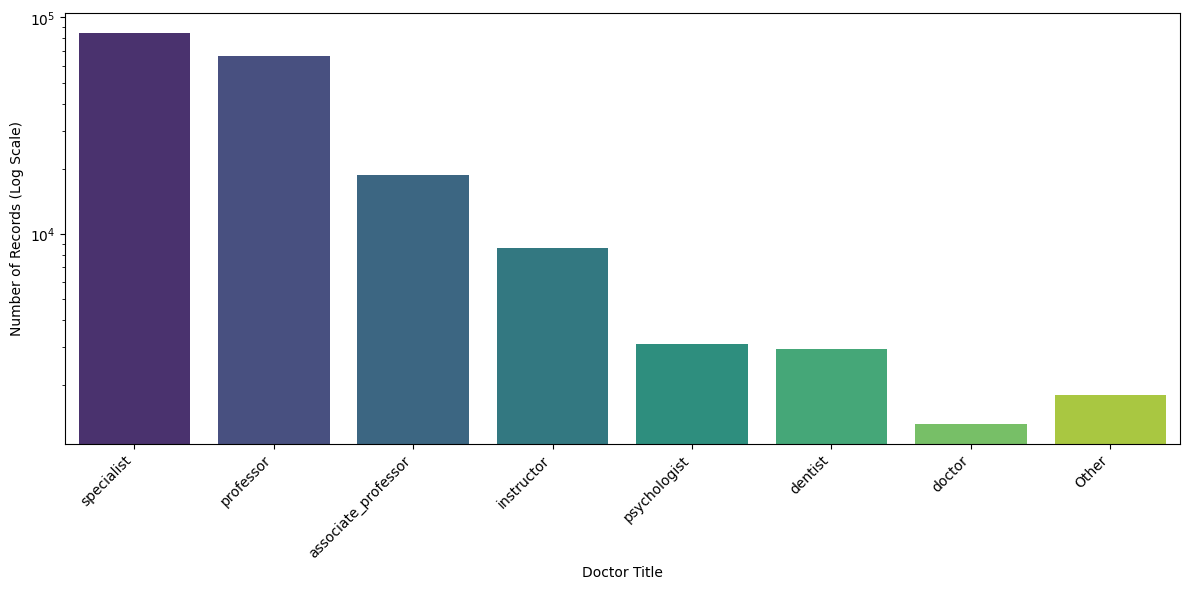

/var/folders/gs/crm1zcvj00j1kl0l1lvz4qf40000gn/T/ipykernel_22096/2427438805.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_counts.index, y=combined_counts.values, palette="viridis")  # No log scale


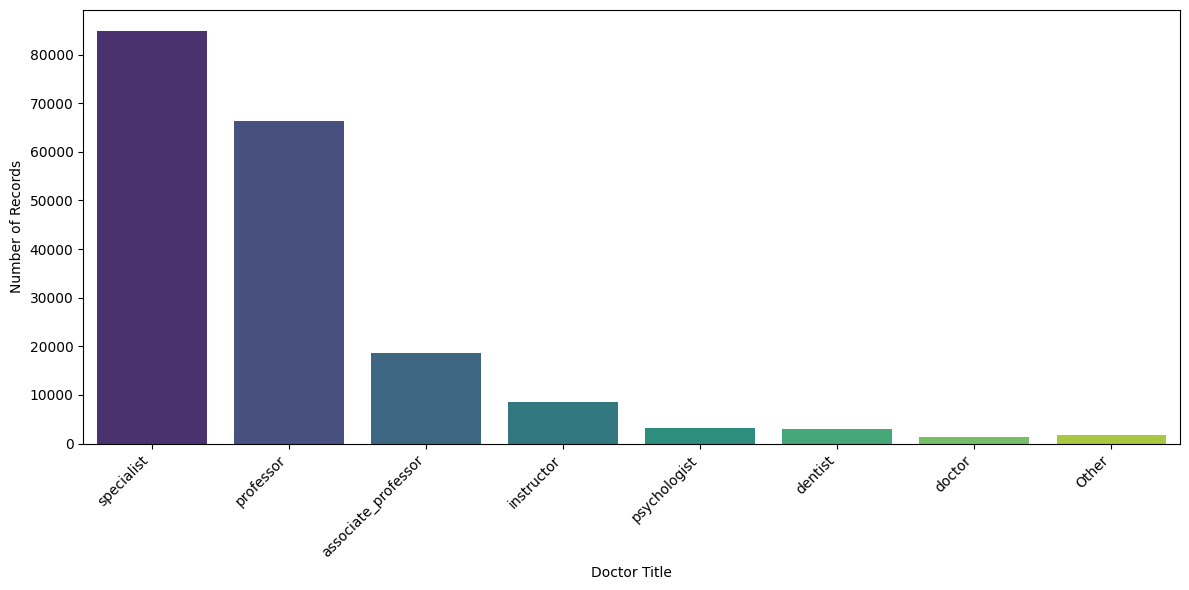

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

doctor_title_counts = df['doctor_title'].value_counts()

# 1. Combine Smaller Categories:
threshold = 1000  # Adjust this threshold as needed
other_count = doctor_title_counts[doctor_title_counts < threshold].sum()
top_titles = doctor_title_counts[doctor_title_counts >= threshold]
combined_counts = pd.concat([top_titles, pd.Series({'Other': other_count})])

print(combined_counts)

# 2. Logarithmic Scale (Optional, but likely helpful in this case):
plt.figure(figsize=(12, 6))
sns.barplot(x=combined_counts.index, y=combined_counts.values, palette="viridis")
plt.yscale('log')  # Use log scale to visualize smaller bars better
# plt.title('Distribution of Doctor Titles (Log Scale, Combined Categories)')
plt.xlabel('Doctor Title')
plt.ylabel('Number of Records (Log Scale)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Alternative: Linear Scale if log scale not desired:
plt.figure(figsize=(12, 6))
sns.barplot(x=combined_counts.index, y=combined_counts.values, palette="viridis")  # No log scale
# plt.title('Distribution of Doctor Titles (Combined Categories)') # Changed the title
plt.xlabel('Doctor Title')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

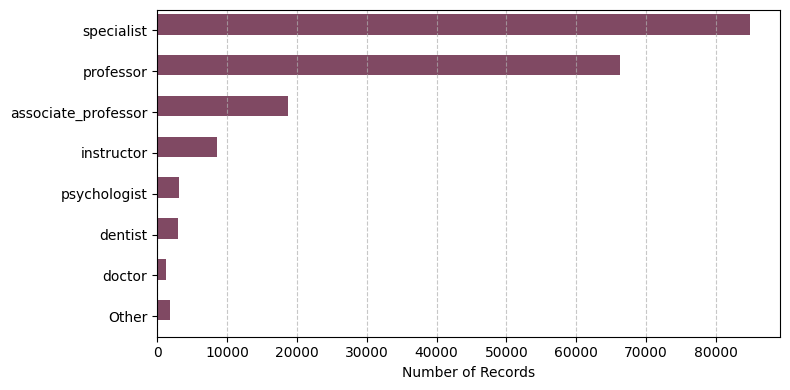

In [30]:
# Threshold ve kategorileri birleştirme  
threshold = 1000  
other_count = doctor_title_counts[doctor_title_counts < threshold].sum()  
top_titles = doctor_title_counts[doctor_title_counts >= threshold]  
combined_counts = pd.concat([top_titles, pd.Series({'Other': other_count})])  

# Plotting  
plt.figure(figsize=(8, 4))  
sns.barplot(y=combined_counts.index,   
            x=combined_counts.values,   
            color="#9c2d62",  
            saturation=.5,  
            height=0.5)  # Bar yüksekliğini azalt  

plt.ylabel('')
plt.xlabel('Number of Records')  
plt.xticks(rotation=0)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()  

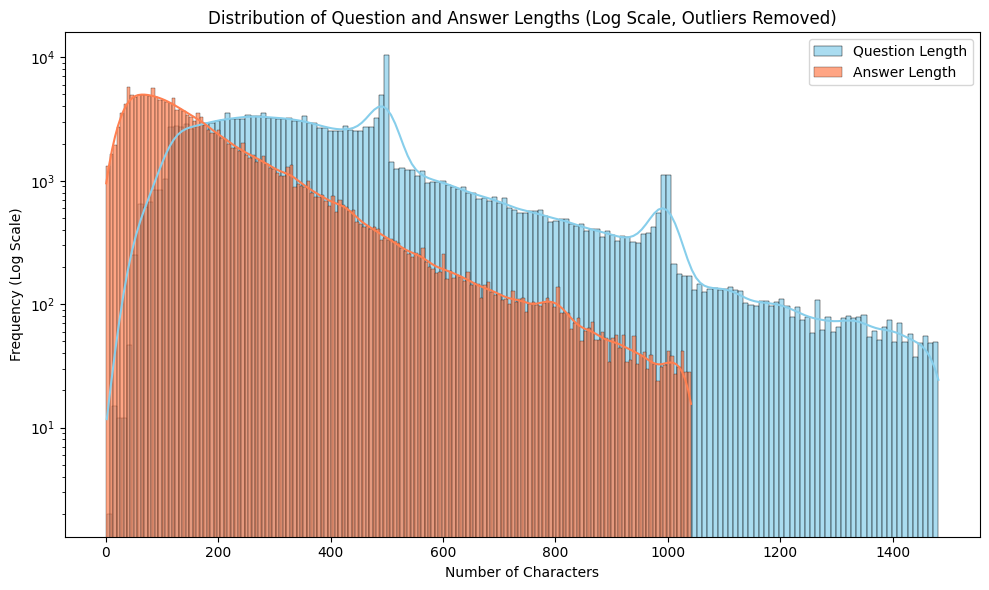

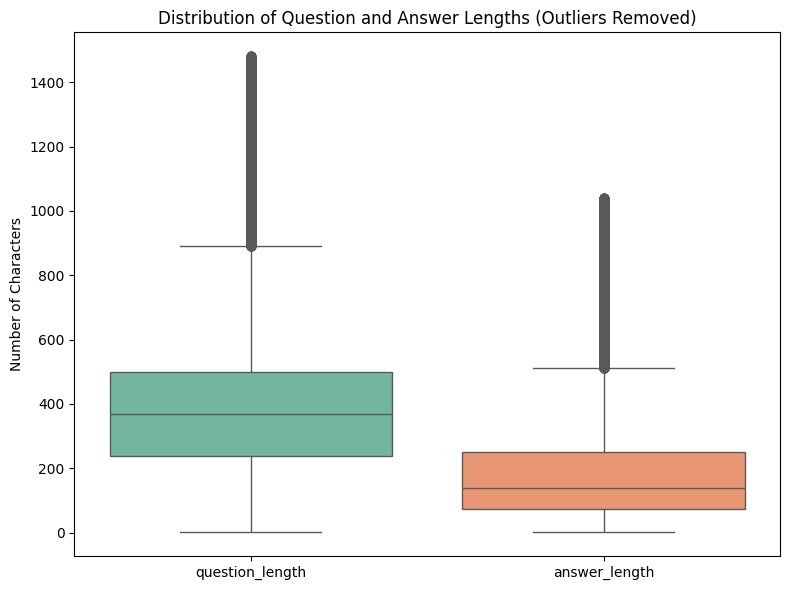

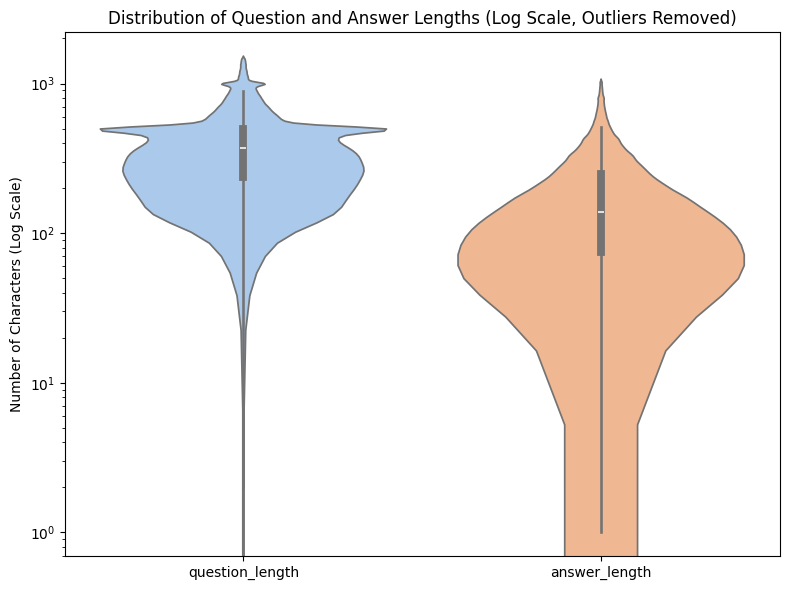

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the length of questions and answers
df['question_length'] = df['question_content'].str.len()
df['answer_length'] = df['question_answer'].str.len()


# 5. Remove very long outliers (adjust quantile as needed)
filter_threshold_question = df['question_length'].quantile(0.99)
filter_threshold_answer = df['answer_length'].quantile(0.99) #Filtering answers too
filtered_df = df[(df['question_length'] <= filter_threshold_question) & (df['answer_length'] <= filter_threshold_answer)]


# 1. Histograms with KDE and Log Scale:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['question_length'], label='Question Length', kde=True, color='skyblue', alpha=0.7)
sns.histplot(filtered_df['answer_length'], label='Answer Length', kde=True, color='coral', alpha=0.7)
plt.yscale('log')  # Log scale for y-axis
plt.title('Distribution of Question and Answer Lengths (Log Scale, Outliers Removed)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()


# 2. Box Plots with Outliers Removed:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df[['question_length', 'answer_length']], orient='v', palette="Set2")
plt.title('Distribution of Question and Answer Lengths (Outliers Removed)')
plt.ylabel('Number of Characters')
plt.xticks([0,1], ['question_length', 'answer_length']) # Explicitly labeling x-axis
plt.tight_layout()
plt.show()


# 3. Violin Plots with Outliers Removed and Log Scale:
plt.figure(figsize=(8, 6))
sns.violinplot(data=filtered_df[['question_length', 'answer_length']], orient='v', palette="pastel")
plt.yscale('log')  # Log scale for y-axis
plt.title('Distribution of Question and Answer Lengths (Log Scale, Outliers Removed)')
plt.ylabel('Number of Characters (Log Scale)')
plt.xticks([0,1], ['question_length', 'answer_length']) # Explicitly labeling x-axis
plt.tight_layout()
plt.show()

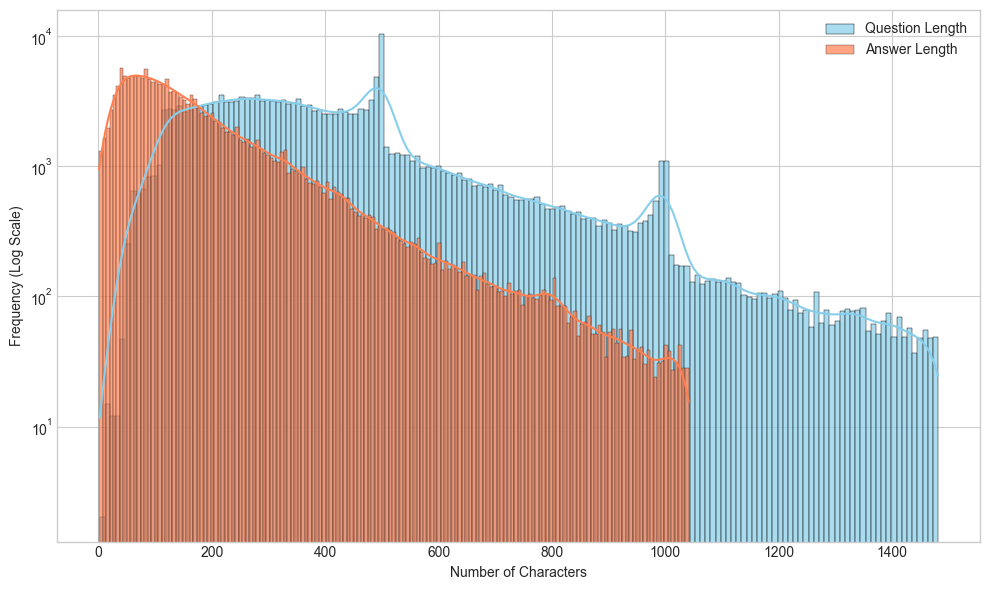

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (calculate question_length and answer_length as before)


# Remove outliers (adjust quantile as needed - 0.99 is a good starting point)
filter_threshold_question = df['question_length'].quantile(0.99)
filter_threshold_answer = df['answer_length'].quantile(0.99)
filtered_df = df[(df['question_length'] <= filter_threshold_question) & (df['answer_length'] <= filter_threshold_answer)]


# 2. Histograms with KDE and Log Scale to show the shape of the distribution:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['question_length'], label='Question Length', kde=True, color='skyblue', alpha=0.7)
sns.histplot(filtered_df['answer_length'], label='Answer Length', kde=True, color='coral', alpha=0.7)
plt.yscale('log')  # Log scale for better visualization of skewed data
# plt.title('Distribution of Question and Answer Lengths (Log Scale, Outliers Removed)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()

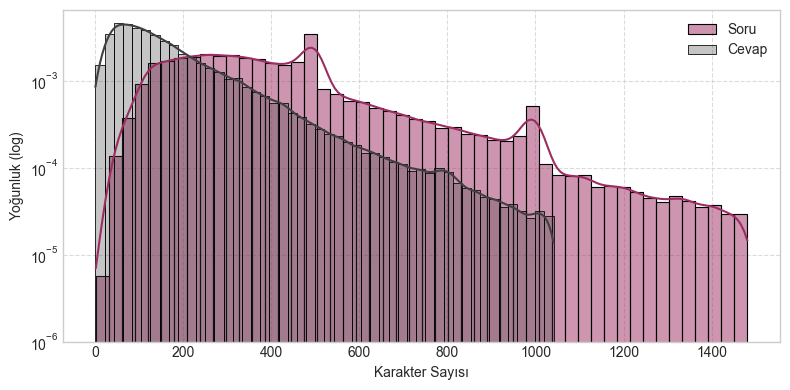

In [43]:
# Veri filtreleme  
filter_threshold_question = df['question_length'].quantile(0.99)  
filter_threshold_answer = df['answer_length'].quantile(0.99)  
filtered_df = df[(df['question_length'] <= filter_threshold_question) &   
                (df['answer_length'] <= filter_threshold_answer)]  

# Plotting  
plt.figure(figsize=(8, 4))  

# Histograms with KDE  
sns.histplot(data=filtered_df['question_length'],   
            label='Soru',   
            color='#9c2d62',  
            alpha=0.5,  
            kde=True,  
            bins=50,  
            stat='density')  
sns.histplot(data=filtered_df['answer_length'],   
            label='Cevap',   
            color='#404040',  
            alpha=0.3,  
            kde=True,  
            bins=50,  
            stat='density')  

plt.yscale('log')  
plt.ylim(bottom=10**-6)  # Alt limit ayarı  
plt.xlabel('Karakter Sayısı')  
plt.ylabel('Yoğunluk (log)')  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.legend()  
plt.tight_layout()  
plt.show()  

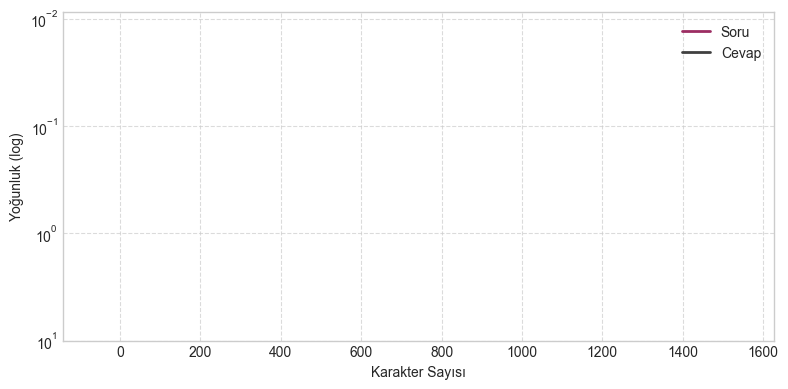

In [41]:
# Remove outliers (adjust quantile as needed - 0.99 is a good starting point)
filter_threshold_question = df['question_length'].quantile(0.99)
filter_threshold_answer = df['answer_length'].quantile(0.99)
filtered_df = df[(df['question_length'] <= filter_threshold_question) & (df['answer_length'] <= filter_threshold_answer)]

# Plotting  
plt.figure(figsize=(8, 4))  

# KDE plots  
sns.kdeplot(data=filtered_df['question_length'],   
            label='Soru',   
            color='#9c2d62',  
            linewidth=2)  
sns.kdeplot(data=filtered_df['answer_length'],   
            label='Cevap',   
            color='#404040',  
            linewidth=2)  

plt.yscale('log')  
plt.ylim(bottom=10**1)  
plt.xlabel('Karakter Sayısı')  
plt.ylabel('Yoğunluk (log)')  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.legend()  
plt.tight_layout()  
plt.show()  

/var/folders/gs/crm1zcvj00j1kl0l1lvz4qf40000gn/T/ipykernel_8402/878902589.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=combined_counts.index, x=combined_counts.values, palette="viridis", orient='h')


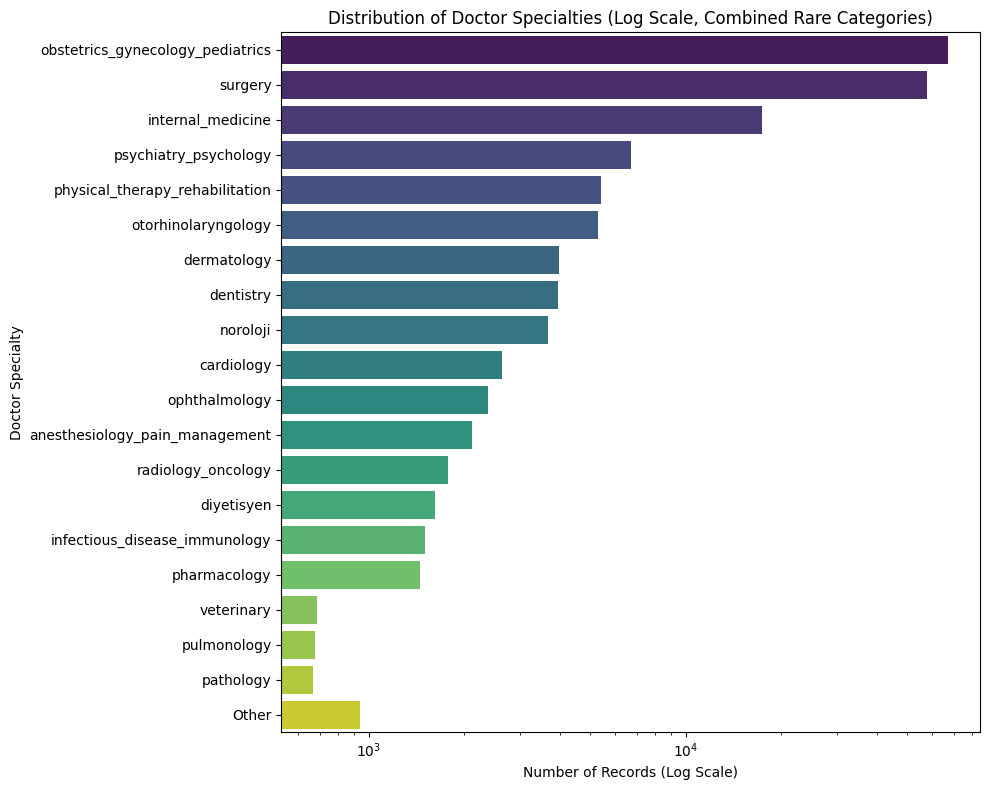

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

specialty_counts = df['doctor_speciality'].value_counts()

# 1. Combine VERY infrequent categories (adjust threshold as needed)
threshold = 500  # Lower threshold to combine only the very smallest
other_count = specialty_counts[specialty_counts < threshold].sum()
top_specialties = specialty_counts[specialty_counts >= threshold]
combined_counts = pd.concat([top_specialties, pd.Series({'Other': other_count})])


# 2. Horizontal bar plot with log scale:
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.barplot(y=combined_counts.index, x=combined_counts.values, palette="viridis", orient='h')
plt.xscale('log')  # Log scale for x-axis to handle imbalance
plt.title('Distribution of Doctor Specialties (Log Scale, Combined Rare Categories)')
plt.xlabel('Number of Records (Log Scale)')
plt.ylabel('Doctor Specialty')
plt.tight_layout()
plt.show()

obstetrics_gynecology_pediatrics    67286
surgery                             57462
internal_medicine                   17426
psychiatry_psychology                6702
physical_therapy_rehabilitation      5405
otorhinolaryngology                  5270
dermatology                          3985
dentistry                            3966
noroloji                             3672
cardiology                           2637
ophthalmology                        2382
anesthesiology_pain_management       2115
radiology_oncology                   1776
diyetisyen                           1620
infectious_disease_immunology        1508
pharmacology                         1449
Other                                2971
dtype: int64


/var/folders/gs/crm1zcvj00j1kl0l1lvz4qf40000gn/T/ipykernel_8402/278732829.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=truncated_labels, y=combined_counts.values, palette="viridis")


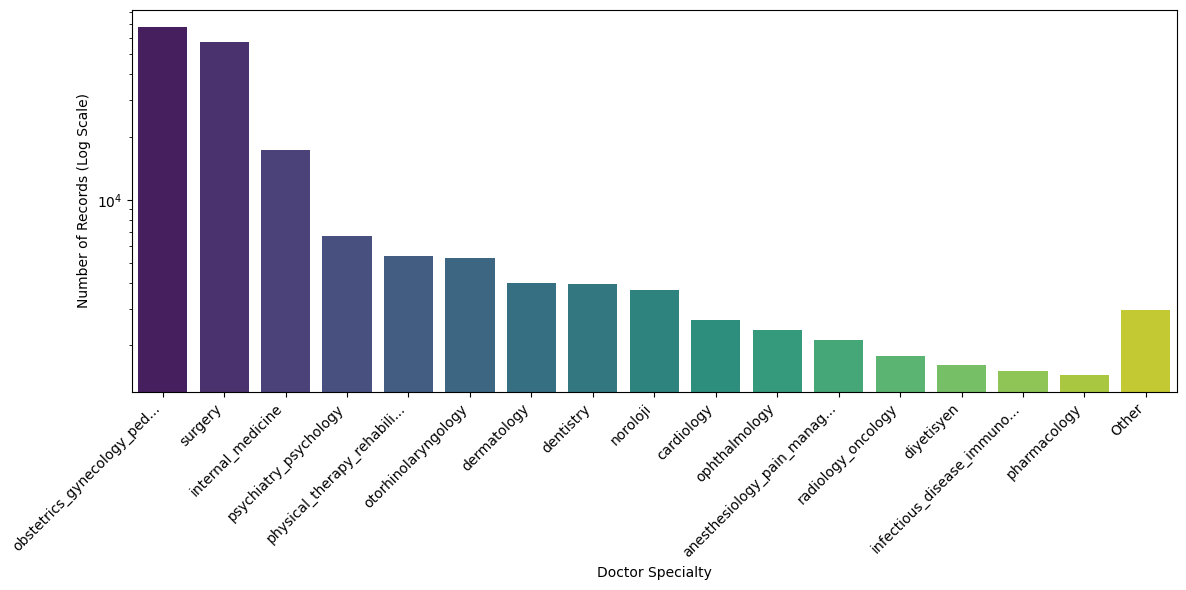

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

specialty_counts = df['doctor_speciality'].value_counts()

# 1. Combine smaller categories:
threshold = 1000  # Adjust as needed
other_count = specialty_counts[specialty_counts < threshold].sum()
top_specialties = specialty_counts[specialty_counts >= threshold]
combined_counts = pd.concat([top_specialties, pd.Series({'Other': other_count})])

# 2. Truncate long specialty names:
max_label_length = 25  # Adjust as needed
truncated_labels = combined_counts.index.map(lambda x: x[:max_label_length] + "..." if len(x) > max_label_length else x)

print(combined_counts)

# 3. Vertical bar plot with truncated labels and log scale:
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.barplot(x=truncated_labels, y=combined_counts.values, palette="viridis")
plt.yscale('log')  # Log scale for the y-axis to handle imbalance
# plt.title('Distribution of Doctor Specialties (Log Scale, Truncated Labels)') #Updated Title
plt.xlabel('Doctor Specialty')
plt.ylabel('Number of Records (Log Scale)') # Updated y-axis label
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

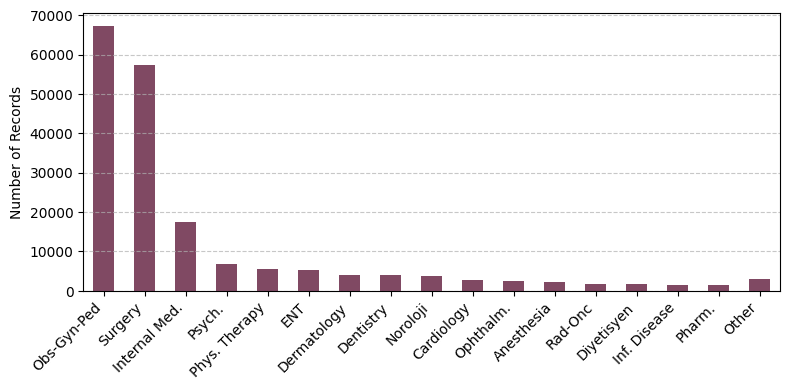

In [33]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  

# Uzmanlık alanlarını kısaltma  
specialties = {  
    'obstetrics_gynecology_pediatrics': 'Obs-Gyn-Ped',  
    'surgery': 'Surgery',  
    'internal_medicine': 'Internal Med.',  
    'psychiatry_psychology': 'Psych.',  
    'physical_therapy_rehabilitation': 'Phys. Therapy',  
    'otorhinolaryngology': 'ENT',  
    'dermatology': 'Dermatology',  
    'dentistry': 'Dentistry',  
    'noroloji': 'Noroloji',  
    'cardiology': 'Cardiology',  
    'ophthalmology': 'Ophthalm.',  
    'anesthesiology_pain_management': 'Anesthesia',  
    'radiology_oncology': 'Rad-Onc',  
    'diyetisyen': 'Diyetisyen',  
    'infectious_disease_immunology': 'Inf. Disease',  
    'pharmacology': 'Pharm.',  
    'Other': 'Other'  
}  

# Veri serisi oluştur  
counts = pd.Series([67286, 57462, 17426, 6702, 5405, 5270, 3985, 3966, 3672,   
                   2637, 2382, 2115, 1776, 1620, 1508, 1449, 2971],  
                  index=specialties.keys())  

# İndex'leri kısaltılmış versiyonlarla değiştir  
counts.index = [specialties[idx] for idx in counts.index]  

# Plotting  
plt.figure(figsize=(8, 4))  
sns.barplot(x=counts.index,   
            y=counts.values,   
            color="#9c2d62",  
            saturation=.5,  
            width=0.5)  

plt.xlabel('')  
plt.ylabel('Number of Records')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()